## **IMPORTING LIBRARIES**

In [57]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import os
from skimage.io import imread
from skimage.transform import resize,rescale, resize, downscale_local_mean,rotate
import skimage
from skimage import data, color,exposure
from skimage.color import rgb2hsv
from skimage.filters import sobel_h,median
from numpy import fliplr, flipud

## **DATASET FOLDER FROM GOOGLE DRIVE**

In [2]:
data='/content/drive/MyDrive/kaggle/rice/ricedisease'

## **LIST OF DIRECTORY AND FILENAMES**

In [3]:
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172131.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172101.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172952.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172322.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172925.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172210.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_173344.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172446.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_172411.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_173904.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_175230.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190419_174552.jpg
/content/drive/MyDrive/kaggle/rice/ricedisease/Healt

## **COUNTING IMAGES PER FOLDER**

In [8]:
image_count = []
class_names = []

for folder in os.listdir(os.path.join(data)):
    folder_num = len(os.listdir(os.path.join(data, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)

Healthy              40
Bacterial leaf blight 40
Brown spot           40
Leaf smut            40


## **PREPROCESSED DATA OF SINGLE IMAGE (SKIMAGE)**

Populating the interactive namespace from numpy and matplotlib


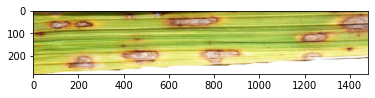

In [131]:
%pylab inline
img = skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot/DSC_0105.jpg')
imggrey = skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot/DSC_0105.jpg',as_gray=True)
#img_hsv=rgb2hsv(img)
#img_resized = resize(imggrey, (104, 104))
#img_rescaled = rescale(img_resized, scale=(0.5))
#img_rescaled = rescale(img_resized, scale=(1),anti_aliasing=True,mode='reflect')
#img_rotated = rotate(img, angle=45)
#img_rotated = rotate(img, angle=45,resize=True)
#img_flip = fliplr(img)
#img_bright = exposure.adjust_gamma(img, gamma=0.5,gain=1)
#img_dark = exposure.adjust_gamma(img, gamma=1.5,gain=1)
#img_sobelh = sobel_h(imggrey)
#print(img.shape)
#print(imggrey.shape)
#print(img_resized.shape)
imgplot = plt.imshow(img)
plt.show()

## **PREPROCESSED DATA OF WHOLE IMAGES (SKIMAGE)**

In [ ]:
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
      %pylab inline
      print(os.path.join(dirname, filename))
      img = skimage.io.imread(os.path.join(dirname, filename))
      
      imgplot = plt.imshow(img)
      plt.show()

## **LOADING IMAGE FROM OPENCV AND PROCESSING**

In [132]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob

def load_image(filename):
    #img = cv2.imread(os.path.join(data, filename))
    img = cv2.imread(os.path.join(data, filename), 0)
    img = cv2.resize(img, (104, 104) )
    img = img /255
    
    return img

## **PREPROCESSED DATA OF SINGLE IMAGE (OPEN CV)**

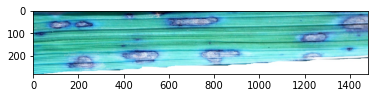

In [180]:
 data=r'/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot/DSC_0105.jpg'
 img = cv2.imread(data)
 #img_grey = cv2.imread(data, 0)
 #img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
 #img_resize = cv2.resize(img,(104,104),interpolation = cv2.INTER_AREA) #INTER_AREA,INTER_LINEAR,INTER_CUBIC
 #img_blurga = cv2.GaussianBlur(img,(5,5),0)
 plt.imshow(img)
 plt.show()

## **PREPROCESSED DATA OF WHOLE IMAGES (OPEN CV)**

In [ ]:
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
      img = load_image(os.path.join(dirname, filename))
      plt.imshow(img)
      plt.figure(idx)    
      plt.show()